In [1]:
import random 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os

# Load Data folders and Files from each folder

In [2]:
cats_folder_path = 'animals/cats/'
dogs_folder_path = 'animals/dogs/'
pandas_folder_path = 'animals/panda/'

all_cats = [f"cats_{str(i).zfill(5)}.jpg" for i in range(1, 1001)]
all_dogs = [f"dogs_{str(i).zfill(5)}.jpg" for i in range(1, 1001)]
all_pandas = [f"panda_{str(i).zfill(5)}.jpg" for i in range(1, 1001)]


# Select Random 100 sample from eatch dataset

In [3]:
cat_100 = random.sample(all_cats, 100)
dog_100 = random.sample(all_dogs, 100)
panda_100 = random.sample(all_pandas, 100)

# Load image from fhe file name and Reshape the data (32,32) 

In [4]:
dictionary = {'cat': cats_folder_path, 'dog': dogs_folder_path, 'panda': pandas_folder_path}
data = []
labels = []
shape =[]
for key, value in dictionary.items(): 
    for i in range(100):
        if key == 'cat':
            path = os.path.join(value, cat_100[i])
        elif key == 'dog':
            path = os.path.join(value, dog_100[i])
        elif key == 'panda':
            path = os.path.join(value, panda_100[i])
            
        # Read the image from the file path
        image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

        # Reshape The Image
        resize_image = cv2.resize(image, (32,32))
        shape.append(resize_image.shape)
        data.append(resize_image)
        labels.append(key)

    

# Visulaize random 9 Image

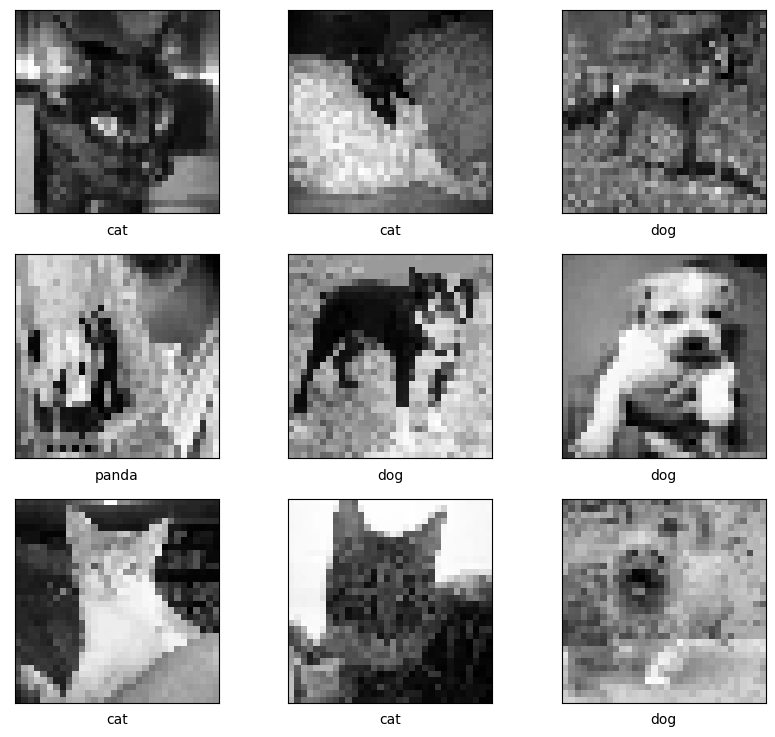

In [5]:
plt.figure(figsize=(10,9))
i=0
for idx in (random.sample(range(0,299),9)):
    i=i+1
    plt.subplot(3,3,i)
    plt.imshow(data[idx+i], cmap='gray')
    plt.xlabel(labels[idx+i])
    plt.xticks([])
    plt.yticks([])
    plt.show

# Check  Shape of dataset

In [6]:
shape = data[0].shape
data_resized = [np.resize(img, shape) for img in data]

data = np.array(data_resized)
data.shape

(300, 32, 32)

# Zip the dataset
**zip data for bind the actual labels with the data**

In [7]:
animal_data = list(zip(data, labels))
random.shuffle(animal_data)


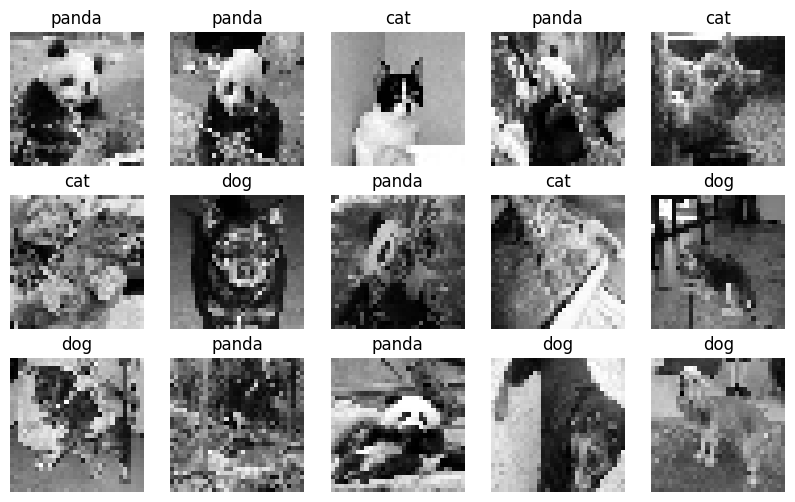

In [8]:
plt.figure(figsize=(10,6))
i=0
for idx in random.sample(range(0,299), 15):
    i=i+1
    plt.subplot(3,5,i)
    plt.imshow(animal_data[idx][0], cmap='gray')
    plt.title(animal_data[idx][1])            
    plt.axis('off')   
    plt.show


# Split Dataset into five fold and each have 60 sample

In [9]:
fold_size = len(animal_data) // 5 
fold_1 = animal_data[0:fold_size]
fold_2 = animal_data[fold_size:2*fold_size]
fold_3 = animal_data[2*fold_size:3*fold_size]
fold_4 = animal_data[3*fold_size:4*fold_size]
fold_5 = animal_data[4*fold_size:5*fold_size]
fold_data = [fold_1, fold_2, fold_3, fold_4, fold_5]


# Function for Distrance Claculation

In [10]:
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y)**2))  

def manhattan_distance(x, y):
    return np.sum(np.abs(x - y))             

# Find Nearest neighbour value

In [11]:
def nearest_neighbor(x):
    categories =['cat', 'panda', 'dog']
    counts=[]
    for catagory in categories :
        count=0
        for i in range(len(x)):
            if(catagory == x[i]):
                count += 1
        counts.append([count, catagory])
    counts.sort(reverse=True)
    return counts[0][1]

In [12]:

num_neighbour = 5 # select number of neighbour is 5
euclidean_acc_folds = []
euclidean_loss_folds = []
manhattan_acc_folds = []
manhattan_loss_folds = []
first_images_info = []
pred_1st=''

for i in range(5):
    x_train_sample=[]
    x_test_sample=[]
    x_test_sample=fold_data[i]
    for j in range(5):
        if(j != i): 
            x_train_sample.extend(fold_data[j])
    test_image_1st = x_test_sample[0][0]
    test_label_1st = x_test_sample[0][1]
    euc_correct = 0 
    man_correct =0
    t=0
    for test_image, test_label in x_test_sample:
        t+=1
        euclidean_dist=[]
        manhattan_dist = []
        for train_image, train_label in x_train_sample:
            
            euc_dist = euclidean_distance(train_image, test_image)
            euclidean_dist.append([euc_dist, train_label])

            man_dist = manhattan_distance(train_image, test_image)
            manhattan_dist.append([man_dist, train_label])

        euclidean_dist.sort(reverse=True)
        manhattan_dist.sort(reverse=True)

        euc_labels =[euclidean_dist[i][1] for i in range(num_neighbour)]
        
        pred = nearest_neighbor(euc_labels)
        if t==1:
            first_images_info.append((test_image_1st, test_label_1st, pred))
        else: 
            t =t
        if pred == test_label :
            euc_correct +=1
            
        man_labels =[manhattan_dist[i][1] for i in range(num_neighbour)]
        pred = nearest_neighbor(man_labels)
        if pred == test_label :
            man_correct +=1
        

    euc_accuracy = euc_correct / len(x_test_sample)
    euclidean_acc_folds.append(euc_accuracy)
    euc_loss = (1 - euc_accuracy)*len(x_test_sample)
    euclidean_loss_folds.append(euc_loss)
    print(f'------------------- Fold {i+1} ---------------')
    print('### Euclidean ###')
    print(f'Accuracy: {euc_accuracy}')
    print(f'Loss: {euc_loss}')
    man_accuracy = man_correct / len(x_test_sample)
    manhattan_acc_folds.append(man_accuracy)
    man_loss = (1 - man_accuracy)*len(x_test_sample)
    manhattan_loss_folds.append(man_loss)
    print('### Manhattan ###')
    print(f'Accuracy: {man_accuracy}')
    print(f'Loss: {man_loss}')

------------------- Fold 1 ---------------
### Euclidean ###
Accuracy: 0.3333333333333333
Loss: 40.00000000000001
### Manhattan ###
Accuracy: 0.4
Loss: 36.0
------------------- Fold 2 ---------------
### Euclidean ###
Accuracy: 0.43333333333333335
Loss: 34.0
### Manhattan ###
Accuracy: 0.4666666666666667
Loss: 32.0
------------------- Fold 3 ---------------
### Euclidean ###
Accuracy: 0.25
Loss: 45.0
### Manhattan ###
Accuracy: 0.31666666666666665
Loss: 41.0
------------------- Fold 4 ---------------
### Euclidean ###
Accuracy: 0.18333333333333332
Loss: 49.0
### Manhattan ###
Accuracy: 0.31666666666666665
Loss: 41.0
------------------- Fold 5 ---------------
### Euclidean ###
Accuracy: 0.3
Loss: 42.0
### Manhattan ###
Accuracy: 0.31666666666666665
Loss: 41.0


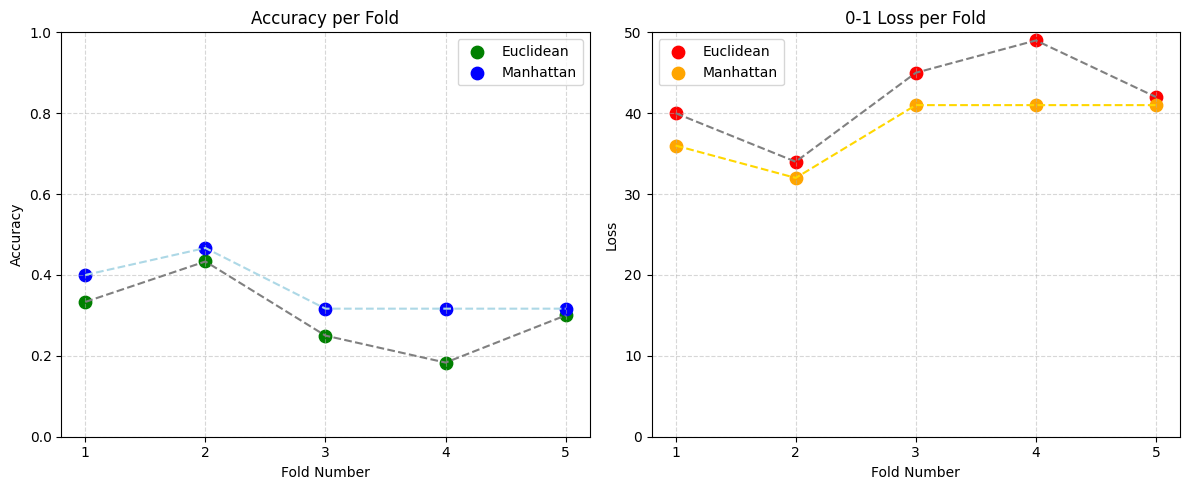

In [13]:
# ---------- Plotting ----------
plt.figure(figsize=(12, 5))

# Euclidean Accuracy
plt.subplot(1, 2, 1)
plt.scatter(range(1, 6), euclidean_acc_folds, color='green', s=80, label='Euclidean')
plt.plot(range(1, 6), euclidean_acc_folds, linestyle='--', color='gray')
plt.scatter(range(1, 6), manhattan_acc_folds, color='blue', s=80, label='Manhattan')
plt.plot(range(1, 6), manhattan_acc_folds, linestyle='--', color='lightblue')
plt.title('Accuracy per Fold')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(range(1, 6))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

# Loss per Fold
plt.subplot(1, 2, 2)
plt.scatter(range(1, 6), euclidean_loss_folds, color='red', s=80, label='Euclidean')
plt.plot(range(1, 6), euclidean_loss_folds, linestyle='--', color='gray')
plt.scatter(range(1, 6), manhattan_loss_folds, color='orange', s=80, label='Manhattan')
plt.plot(range(1, 6), manhattan_loss_folds, linestyle='--', color='gold')
plt.title('0-1 Loss per Fold')
plt.xlabel('Fold Number')
plt.ylabel('Loss')
plt.ylim(0, 50)  # <-- changed from 0–1 to 0–50
plt.xticks(range(1, 6))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()

---
# **Results and Analysis**

For each fold, we will vary the hyperparameter $K$ (the number of nearest neighbors) and record the accuracy achieved by the model for each value of $K$. We will compute the average accuracy across all folds for each value of $K$ and distance calculation technique.

Next, we will plot a graph with $K$ on the X-axis and accuracy on the Y-axis for both the Manhattan (L1) and Euclidean (L2) distances. This graph will allow us to visualize the impact of different values of $K$ on the model's accuracy for each distance calculation technique.

* **Best and Worst Results:**

  * Fold 2 gives the best result for both distance metrics.
  * Fold 4 has the lowest results.
* **Comparison in Fold 1:**

  * Both Manhattan and Euclidean distances perform similarly, but over time, Manhattan slightly outperforms Euclidean.
  * Manhattan also exhibits a better loss compared to Euclidean.

---


# Printed Top One image and its prediction from eatch FOLD

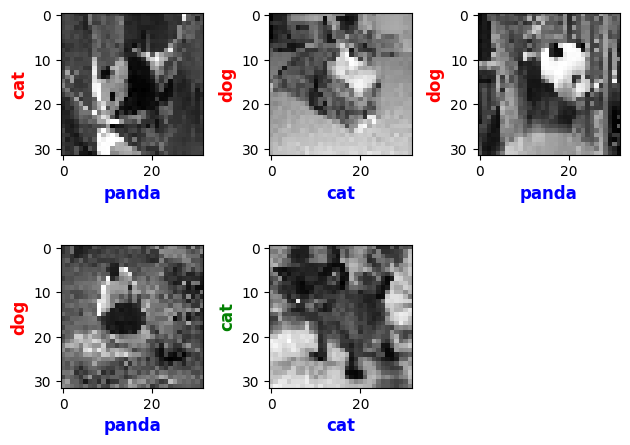

In [14]:
plt.figure()
for i in range(5):
    plt.subplot(2, 3, i + 1)
    plt.imshow(first_images_info[i][0], cmap='gray')
    plt.xlabel(first_images_info[i][1], color='b', fontsize=12, fontweight='bold')
    
    if first_images_info[i][1] != first_images_info[i][2]:
        plt.ylabel(first_images_info[i][2], color='r', fontsize=12, fontweight='bold')
    else:
        plt.ylabel(first_images_info[i][2], color='g', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()



---
# **Discussion**

In this section, we compare the performance of Manhattan (L1) and Euclidean (L2) distances based on the average accuracy values obtained from the 5-fold cross-validation. Key factors influencing performance include:

* **Dataset Characteristics:**

  * The reshaping of images to 32 x 32 and conversion to grayscale results in a significant loss of pixel information. Exploring techniques to recover this lost information could improve performance.
* **Feature Nature and Class Complexity:**

  * The performance difference may stem from how these distance metrics handle the dataset's features and the complexity of the classes.

### Future Improvements:

1. Implement advanced preprocessing to retain critical pixel information.
2. Experiment with additional distance metrics like Minkowski or cosine distance.
3. Investigate hyperparameter tuning and dimensionality reduction techniques to further enhance accuracy.

---
